# Correlation Discovery Notebook

## Objectives

*   Answer business requirement 1: 
    * Identify which house attributes are most strongly correlated with sale price using visualizations.

## Inputs

* outputs/datasets/collection/house_prices_records.csv


## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/housing-prices/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/housing-prices'

---

# Load Data

In [6]:
import pandas as pd
df1 = (pd.read_csv("/workspaces/housing-prices/outputs/datasets/collection/house_prices_records.csv"))
df1.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [7]:
df1.describe().T

missing = df1.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df1)) * 100

missing_df1 = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_df1)

# Numerical columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()

               Missing Count  Missing %
EnclosedPorch           1324  90.684932
WoodDeckSF              1305  89.383562
LotFrontage              259  17.739726
GarageFinish             235  16.095890
BsmtFinType1             145   9.931507
BedroomAbvGr              99   6.780822
2ndFlrSF                  86   5.890411
GarageYrBlt               81   5.547945
BsmtExposure              38   2.602740
MasVnrArea                 8   0.547945


# Correlation Study
We are looking for:

- Strong positive correlation: e.g., GrLivArea, OverallQual, GarageArea
- Weak or negative correlation: e.g., BedroomAbvGr, KitchenAbvGr
- Multicollinearity: Are top features strongly correlated with each other? (we will check the heatmap)

In [8]:
# Select only numeric columns
numeric_df1 = df1.select_dtypes(include=['int64', 'float64'])

# Compute correlation with SalePrice
correlation_matrix = numeric_df1.corr()
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
BedroomAbvGr     0.161901
OverallCond     -0.077856
EnclosedPorch   -0.176458
Name: SalePrice, dtype: float64


Visualize full correlation matrix

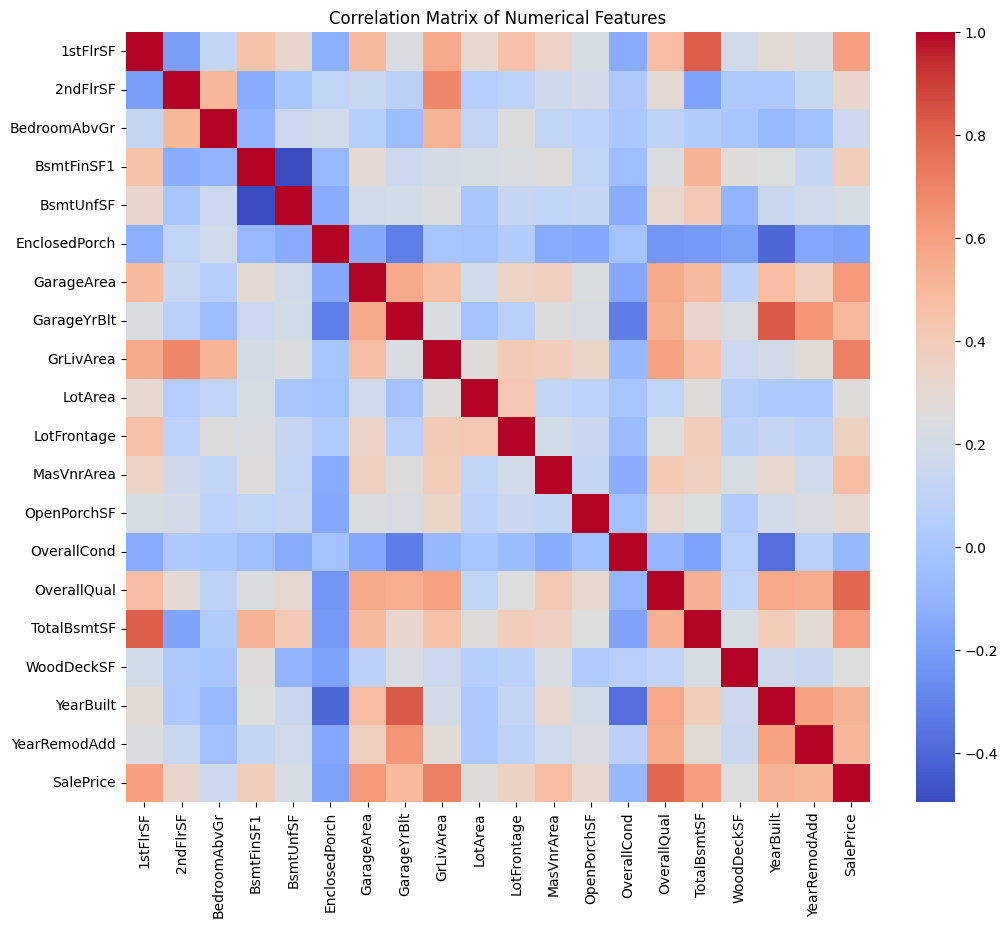

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

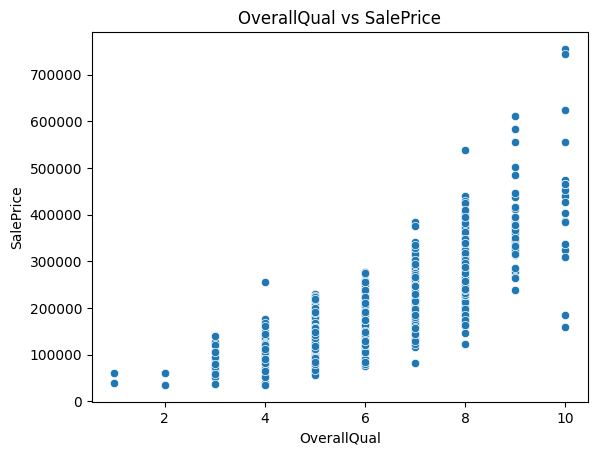

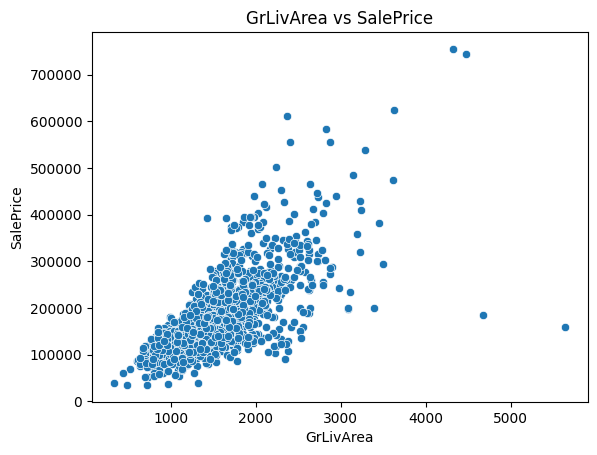

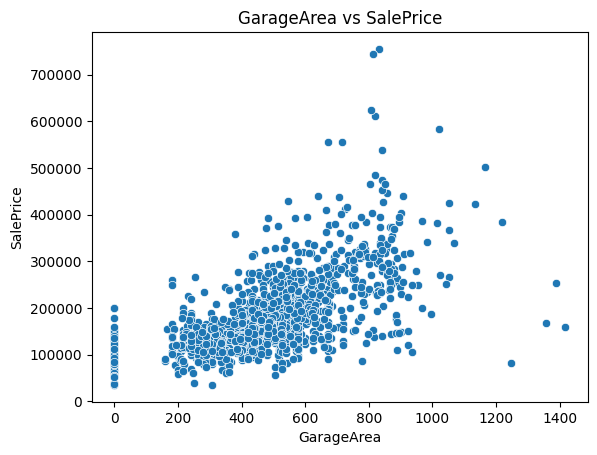

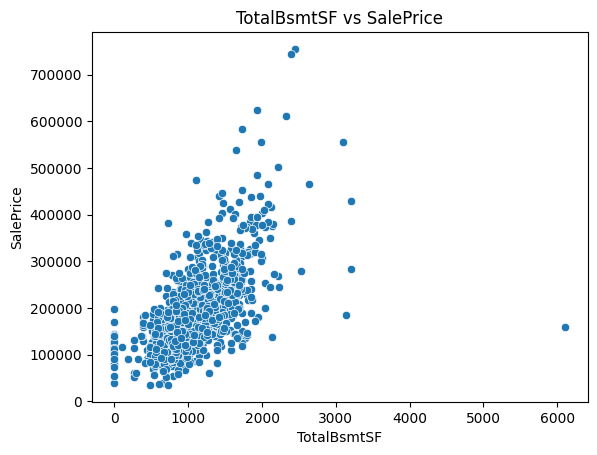

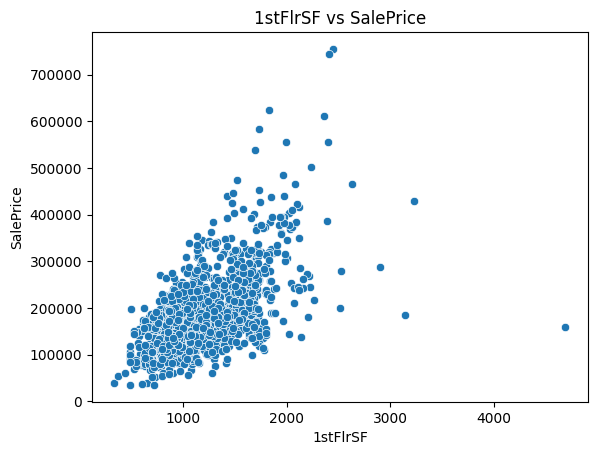

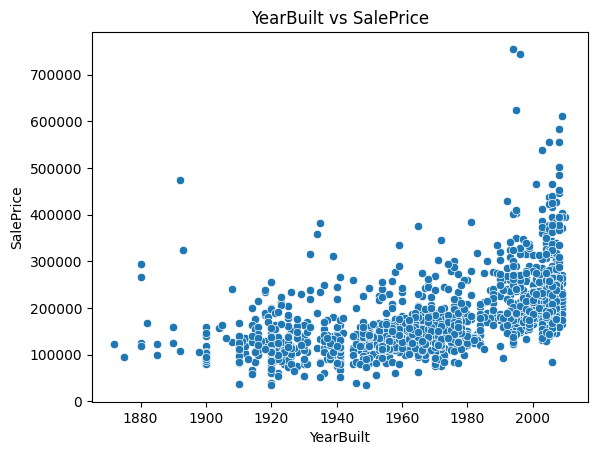

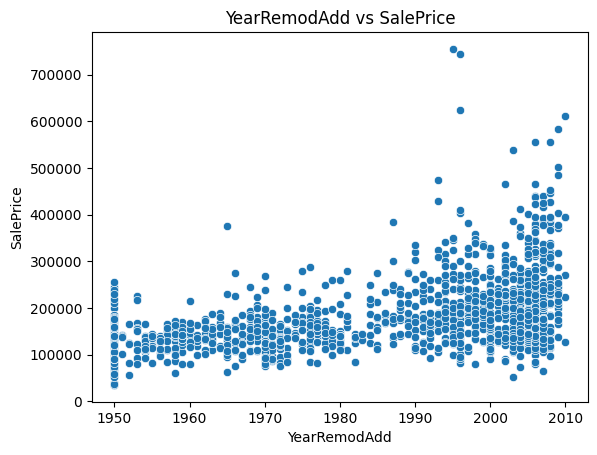

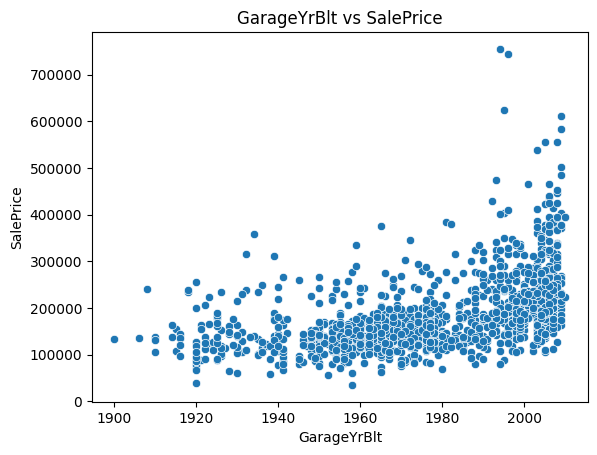

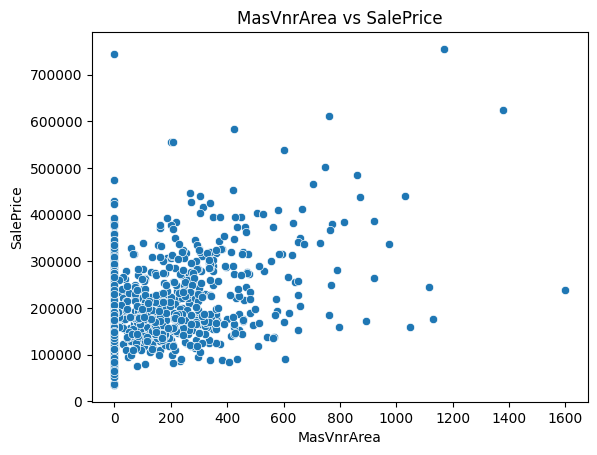

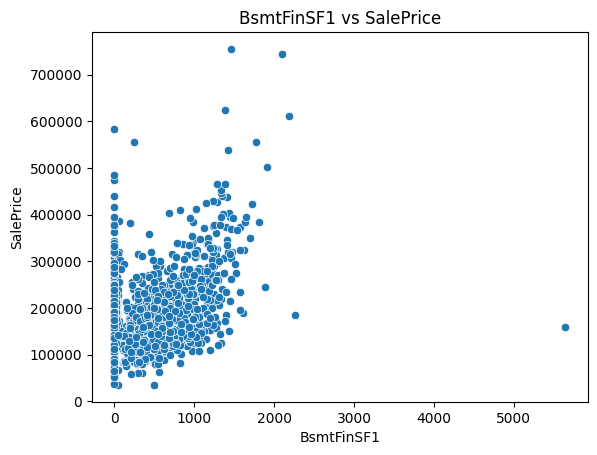

In [10]:
# Get top 10 features positively correlated with SalePrice (excluding SalePrice itself)
top_corr_features = saleprice_corr.drop('SalePrice').head(10).index.tolist()

# Plot scatterplots
for col in top_corr_features:
    sns.scatterplot(x=df1[col], y=df1['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

Top predictors of sale price:

- OverallQual, GrLivArea, GarageArea, TotalBsmtSF, YearBuilt

Weak or misleading indicators:

- BedroomAbvGr, EnclosedPorch, OverallCond

Next Steps:

- Visualize top features vs SalePrice using scatter plots

- Optionally, use Predictive Power Score (PPS) to analyze categorical variables like KitchenQual, GarageFinish

# Correlation Visualizations

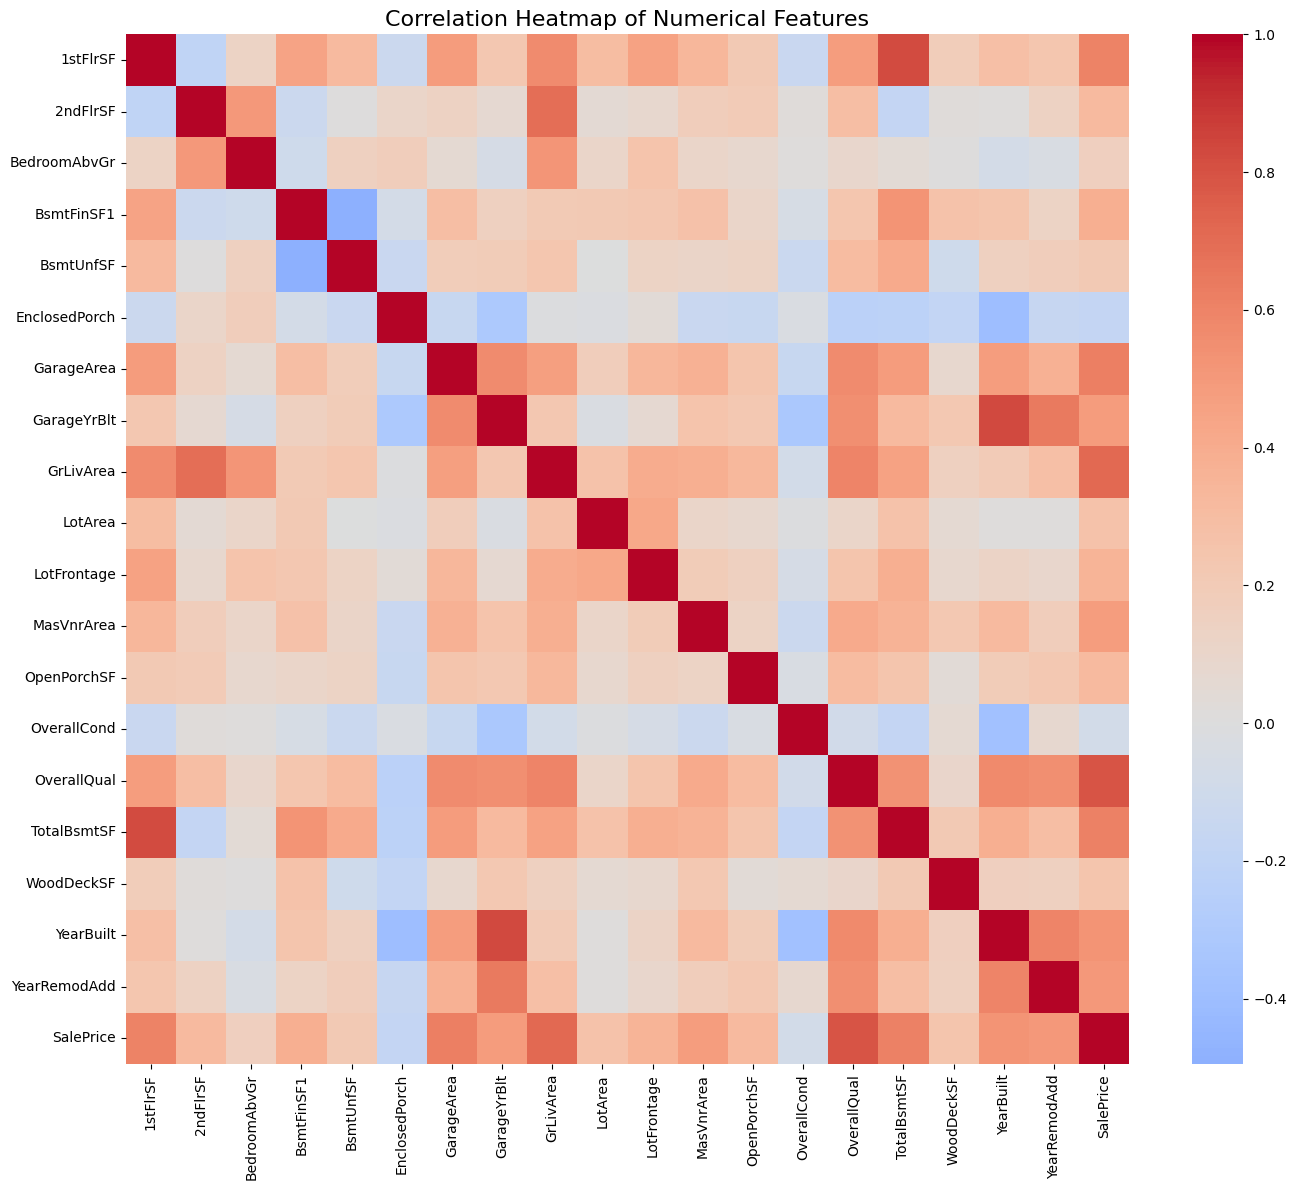

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute full correlation matrix
numeric_df1 = df1.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df1.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## Top 10 Features Correlated with `SalePrice`

We get correlations with SalePrice and bar plot the top correlated features

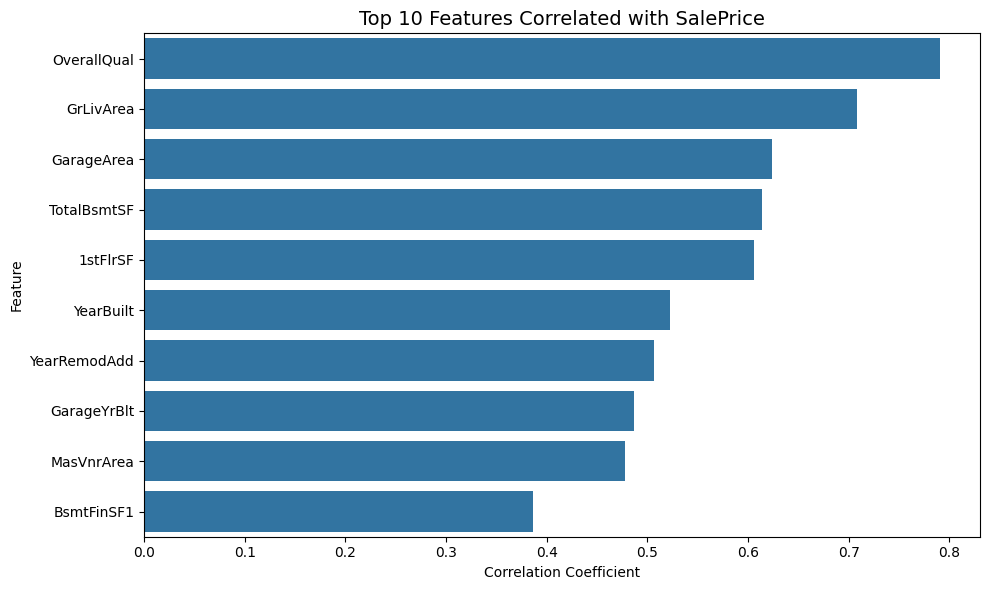

In [12]:
# Get correlations with SalePrice
saleprice_corr = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False)
top_corr = saleprice_corr.head(10)

# Bar plot of top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Features Correlated with SalePrice', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

---

## Scatter Plot for top Predictors

These plots show the actual relationship between each top feature and `SalePrice`.

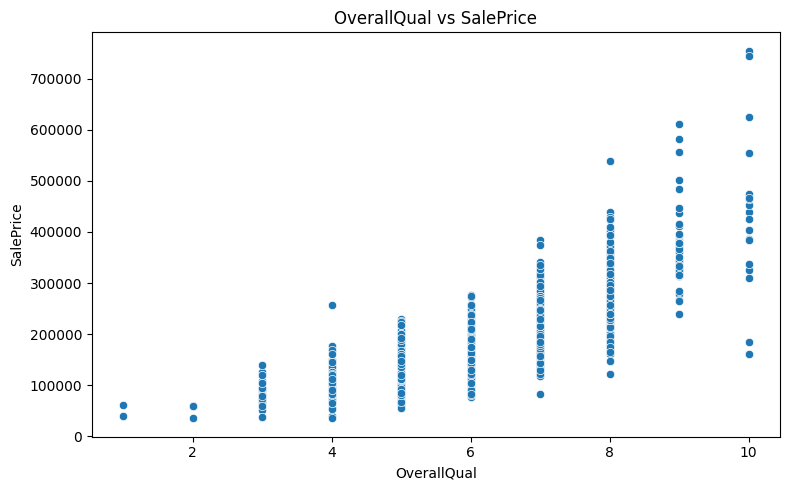

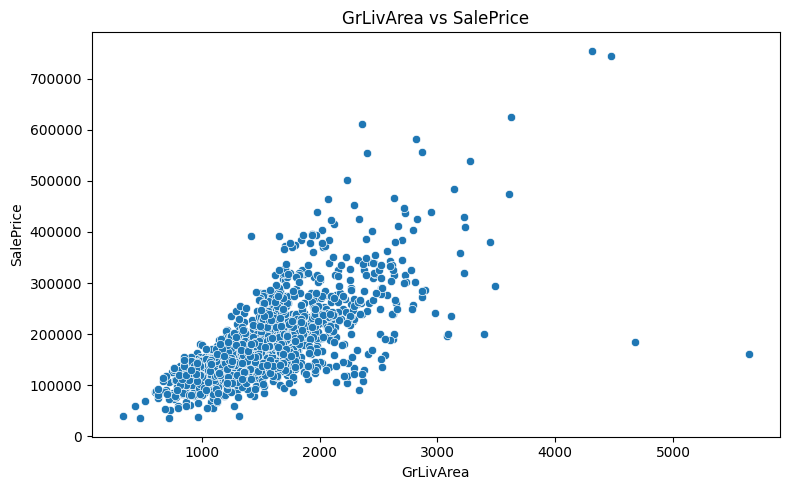

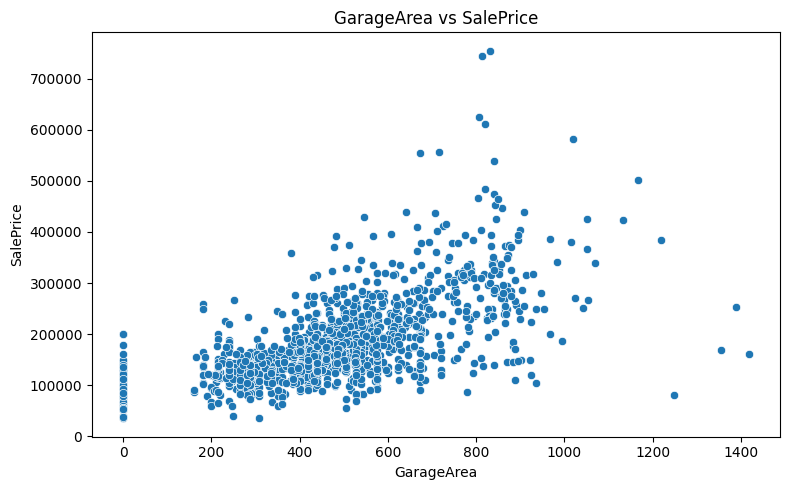

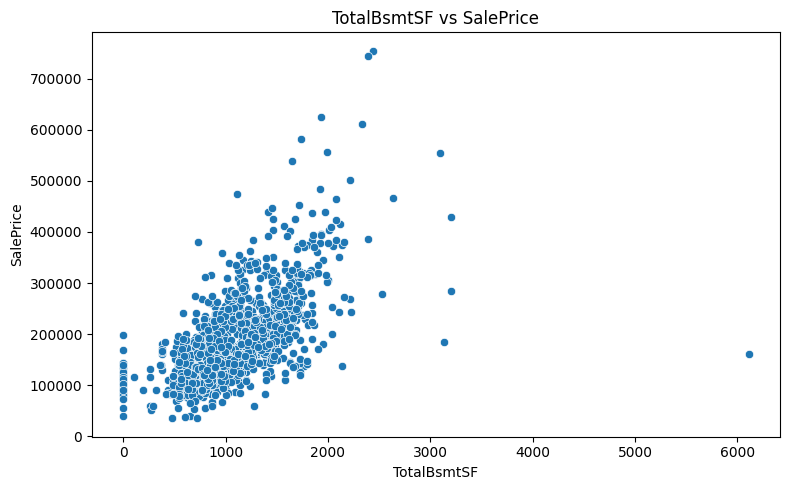

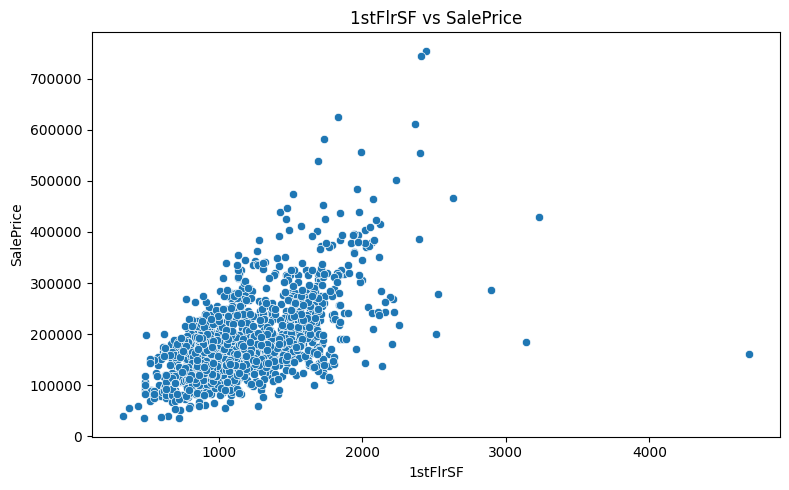

In [14]:
top_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df1[feature], y=df1['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

---

# Conclusions and Next steps

We have:

- Identified the top 10 numerical features most strongly correlated with SalePrice
- Visualized the relationship between each and SalePrice through scatter plots
- Interpreted the trends to explain what drives higher house prices

This fully addresses the first requirement to:

- Identify which house attributes are most strongly correlated with sale price using visualizations.

---

Well done! You generated code that answers business requirement 1 and can be used to build Streamlit App
* In this notebook, we are not pushing any file to the repo.
* Clear the cell's outputs before moving on!